<a href="https://colab.research.google.com/github/isaacchunn/SC1015_MiniPrj_Airbnb/blob/main/Airbnb_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset : Airbnb Singapore Dataset from InsideAirbnb
#### Question : If we were an AirBnb host, how can we maximise our profit?


Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/


# Contents
  1. Linear Regression
  2. Regression 2
  3. Regression 3

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [113]:
# Isaac Chun Jun Heng U2221389B
# J'sen Ong Jia Xuan  U2220457J
# Tang Teck Meng U2221809C

In [114]:
#Basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #We only need pyplot
sb.set() #Set the default Seaborn style for graphics

### Additional Libraries

Import additional libraries

> sklearn : Conduct linear regression analysis

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### General Utility Functions

In [116]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

In [117]:
def removeOutliers(df, colName):
  q1 = df[colName].quantile(0.25)
  q3 = df[colName].quantile(0.75)
  iqr = q3-q1
  low = q1 - 1.5 * iqr
  high = q3 + 1.5 * iqr
  result = df.loc[(df[colName] >= low) & (df[colName] <= high)]
  return result

In [118]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [119]:
#Define a regression func to easily calculate regression among two variables
def calcLinRegression(predictor, response, testSize = 0.2, solidLine = False, f_size = (20,10), xTitle = None, yTitle = None):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    if (predictor is None or response is None):
        print("Invalid input into regression function")
        return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("Regression intercept \t\t: b = ", linreg.intercept_)
    print("Regression coefficients \t: a = ",linreg.coef_)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Print the mean squared and root mean squared error on the train data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Train)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    mseTrain =  mean_squared_error(X_train, y_train_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Print the mean squared and root mean squared error on the test data set
    #Also print goodness of fit.
    print("-------------------------------")
    print("Goodness of Fit (Test)")
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    mseTrain =  mean_squared_error(X_test, y_test_pred)
    print("Mean Squared Error (MSE)\t:", mseTrain)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mseTrain))

    #Plot the regression line
    f = plt.figure(figsize = f_size)
    plt.scatter(X_train, y_train)
    if xTitle:
      plt.xlabel(xTitle)
    if yTitle:
      plt.ylabel(yTitle)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred, explainedVariance)

### Mount Google Drive (unused, uncomment if need add anything from google drive.)

In [120]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

---

>## Hypothesis  

1. The number of amenities a listing provides will affect its price, the more the amenities, the higher the listing price
2. Variables related to a listing's review will have positive correlation to listing's price

---

>## Import the Dataset  

We have imported the cleaned dataset based on our EDA done in the other files.

In [121]:
url = "https://raw.githubusercontent.com/isaacchunn/SC1015_MiniPrj_Airbnb/main/listings_cleaned.csv"
airDF = pd.read_csv(url)
airDF.head()

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


In [122]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          3035 non-null   object 
 1   listing_url                   3035 non-null   object 
 2   description                   2968 non-null   object 
 3   neighborhood_overview         1968 non-null   object 
 4   host_response_time            2405 non-null   object 
 5   host_response_rate            2405 non-null   object 
 6   host_acceptance_rate          2284 non-null   object 
 7   neighbourhood_cleansed        3018 non-null   object 
 8   neighbourhood_group_cleansed  3018 non-null   object 
 9   latitude                      3018 non-null   float64
 10  longitude                     3018 non-null   float64
 11  property_type                 3018 non-null   object 
 12  accommodates                  3018 non-null   float64
 13  ame

In [123]:
print(airDF.dtypes)

name                             object
listing_url                      object
description                      object
neighborhood_overview            object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
accommodates                    float64
amenities                        object
price                            object
minimum_nights                  float64
maximum_nights                  float64
number_of_reviews               float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64


---

>## Cleaning our DataFrame/Dataset

### 1. Drop properties with N/A or 0% acceptance rate as these properties do not get stayed at by visitors.

In [124]:
#Drop all the properties that has no host acceptance rate then drop
airDF = airDF.dropna(subset=["host_acceptance_rate"])
#Then remove all the 0% acceptance rate
airDF = airDF[airDF["host_acceptance_rate"] != 0]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF.head(n=5)

,name,listing_url,description,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable
0,Ensuite Room (Room 1 & 2) near EXPO,https://www.airbnb.com/rooms/71609,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34537,...,20.0,4.44,4.37,4.00,4.63,4.78,4.26,4.32,NaN,f
1,B&B Room 1 near Airport & EXPO,https://www.airbnb.com/rooms/71896,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,within a few hours,90%,100%,Tampines,East Region,1.34754,...,24.0,4.16,4.22,4.09,4.43,4.43,4.17,4.04,NaN,t
2,Room 2-near Airport & EXPO,https://www.airbnb.com/rooms/71903,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,within a few hours,90%,100%,Tampines,East Region,1.34531,...,47.0,4.41,4.39,4.52,4.63,4.64,4.50,4.36,NaN,f
3,Amazing Room with window 10min to Redhill,https://www.airbnb.com/rooms/275343,Awesome location and host <br />Room near INSE...,NaN,within an hour,100%,85%,Bukit Merah,Central Region,1.29015,...,22.0,4.40,4.16,4.26,4.47,4.42,4.53,4.63,S0399,f
4,15 mins to Outram MRT Single Room,https://www.airbnb.com/rooms/275344,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,within an hour,100%,85%,Bukit Merah,Central Region,1.28836,...,14.0,4.50,4.69,4.23,4.62,4.54,4.62,4.46,S0399,f


### 2. Clean the price column using code as it has "$", "," and "." 


In [125]:
airDF["price"]

0       $46,437.00 
1           $81.00 
2           $81.00 
3           $52.00 
4           $49.00 
           ...     
2279        $45.00 
2280        $45.00 
2281       $186.00 
2282       $797.00 
2283       $434.00 
Name: price, Length: 2284, dtype: object

In [126]:
breaks = [",", "$"]
for i in range(len(airDF["price"])):
    s = airDF.loc[:,("price")][i]
    for x in breaks:
        s = s.replace(x,"")
    s = "".join(s.split(".")[:-1])
    airDF.loc[:,("price")][i] = int(s)
airDF = airDF.astype({'price': 'int32'})

<ipython-input-126-e0f04e7ead66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF.loc[:,("price")][i] = int(s)


We also remove any outliers as it is unrealistic for a property to have above > $45,000 per night

In [127]:
airDF = airDF[airDF.price < 45000]
#Resort our indexes
airDF = airDF.reset_index(drop=True)
airDF["price"]

0        81
1        81
2        52
3        49
4       175
       ... 
2275     45
2276     45
2277    186
2278    797
2279    434
Name: price, Length: 2280, dtype: int32

### 3. Convert the amenities column to a list, and add a new column with the number of amenities to be used for our prediction.

In [128]:
airDF["amenities"]

0       ["Cooking basics", "Refrigerator", "Kitchen", ...
1       ["Cooking basics", "Heating", "Kitchen", "Hair...
2       ["Air conditioning", "Shampoo", "Smoke alarm",...
3       ["Air conditioning", "Shampoo", "Smoke alarm",...
4       ["Cooking basics", "Kitchen", "Private entranc...
                              ...                        
2275    ["Air conditioning", "Fire extinguisher", "Sec...
2276    ["Air conditioning", "Fire extinguisher", "Sec...
2277    ["Air conditioning", "Fire extinguisher", "Sec...
2278    ["First aid kit", "EV charger", "Heating", "Re...
2279    ["Air conditioning", "Fire extinguisher", "Fir...
Name: amenities, Length: 2280, dtype: object

In [129]:
#Add a new column of amenities
airDF["no_amenities"] = 0
#Replace all with the integer variant
count = 0
for x in airDF["amenities"]:   
    #Convert string into list
    #Convert string into list
    x = x.replace('[',"")
    x = x.replace(']',"")
    x = x.replace('"', "")
    x = x.replace(", ", ",")
    x = x.split(",")
    airDF["amenities"][count] = x
    airDF["no_amenities"][count] = len(x)
    count += 1

<ipython-input-129-a56617251945>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = x
<ipython-input-129-a56617251945>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(x)


In [130]:
airDF["amenities"].head(n=5)

0    [Cooking basics, Refrigerator, Kitchen, Hair d...
1    [Cooking basics, Heating, Kitchen, Hair dryer,...
2    [Air conditioning, Shampoo, Smoke alarm, Long ...
3    [Air conditioning, Shampoo, Smoke alarm, Long ...
4    [Cooking basics, Kitchen, Private entrance, Ha...
Name: amenities, dtype: object

In [131]:
airDF["no_amenities"].head(n=5)

0    31
1    26
2    17
3    18
4    32
Name: no_amenities, dtype: int64

In [132]:
#Want to visualize the total count of amenities so we can form a generalization such that our number of amenities remains reliable.
amenityCount = {}
for x in airDF["amenities"]:
    for item in x:
        if item in amenityCount:
            amenityCount[item] += 1
        else:
            amenityCount[item] = 1
        
#Add it to a DF
amenityCountDF = pd.DataFrame(columns = ["amenity", "count"])
count = 0
for keys, values in amenityCount.items():
    amenityCountDF.loc[count] = [keys, values]
    count += 1

#Sort the DF
amenityCountDF = amenityCountDF.sort_values(by="count", ascending = False)
amenityCountDF.head(n=15)

,amenity,count
9,Long term stays allowed,2263
7,Wifi,2211
32,Air conditioning,2105
17,Essentials,1949
2,Kitchen,1823
43,Hangers,1805
39,Iron,1740
30,Washer,1703
26,Hot water,1618
3,Hair dryer,1555


In [133]:
amenityCountDF.tail(n=10)

,amenity,count
269,43\ HDTV with Amazon Prime Video,1
270,Fire TV,1
271,Body soap body soap,1
272,Fast wifi \u2013 325 Mbps,1
275,Fast wifi \u2013 152 Mbps,1
277,Coffee maker: drip coffee maker,1
278,BBQ grill: electric,1
280,Private outdoor pool - olympic-sized,1
284,HDTV with standard cable,1
393,Coffee maker: french press,1


We have decided to only use those amenities that are very prominent in most of the listings as the number of amenities should be consistent, and not be filled with many values that do not matter. For example, we do not know what Fire TV is.

In [134]:
#Changeable cutoff that are determined by us to check for robustness of our model
amenityCutOff = 30

In [135]:
uselessAmenityList = amenityCountDF[amenityCountDF["count"] <= amenityCutOff]["amenity"].values.tolist()

In [136]:
#Remove all values in our df that correspond to our useless amenity list
count = 0
for x in airDF["amenities"]:
    l = [i for i in x if i not in uselessAmenityList]
    airDF["amenities"][count] = l
    airDF["no_amenities"][count] = len(l)
    count +=1

<ipython-input-136-ae78827c68ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["amenities"][count] = l
<ipython-input-136-ae78827c68ad>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airDF["no_amenities"][count] = len(l)


### 4. Fill in na values in host_response_time to be a value as we are using it to gather insights

In [137]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 96


In [138]:
airDF["host_response_time"].value_counts()

within an hour        854
within a few hours    737
within a day          479
a few days or more    114
Name: host_response_time, dtype: int64

In [139]:
#Fill it to be the worst scenario to achieve better distribution
airDF = airDF.fillna(value = {"host_response_time": "a few days or more"})
None

In [140]:
print("Null values:", airDF["host_response_time"].isnull().sum().sum())

Null values: 0


In [141]:
airDF["host_response_time"].value_counts()

within an hour        854
within a few hours    737
within a day          479
a few days or more    210
Name: host_response_time, dtype: int64

---

>## Splitting the Dataset

In [142]:
#Split the dataset into train and test in 80:20 ratio
train_data, test_data = train_test_split(airDF, test_size = 0.2, random_state = 55)

#Print out what we have in our test and train data
print("Train Data :")
print("Data type : ", type(train_data))
print("Data dim : ", train_data.shape)
print("---------------------------------------")
print("Test Data :")
print("Data type : ", type(test_data))
print("Data dim : ", test_data.shape)
print("---------------------------------------")

Train Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (1824, 28)
---------------------------------------
Test Data :
Data type :  <class 'pandas.core.frame.DataFrame'>
Data dim :  (456, 28)
---------------------------------------


---

>## 1. Linear Regression 

In [143]:
priceDF = airDF["price"]
priceDF.head(n=5)

0     81
1     81
2     52
3     49
4    175
Name: price, dtype: int32

#### 1a) Using all features (Jsen help put one hot encoding code here so we can use all)

#### 1b) host_response_time vs price 

#### 1c) neighbourhood_cleansed vs price 

#### 1d) property_type vs price 

#### 1e) accommodates vs price 

Regression intercept 		: b =  91.48302334097932
Regression coefficients 	: a =  [65.07683602]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.1286778786606545
Mean Squared Error (MSE)	: 80779.22681235879
Root Mean Squared Error (RMSE) 	: 284.2168658126375
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.10562419902432307
Mean Squared Error (MSE)	: 90576.37394005689
Root Mean Squared Error (RMSE) 	: 300.9590901435889



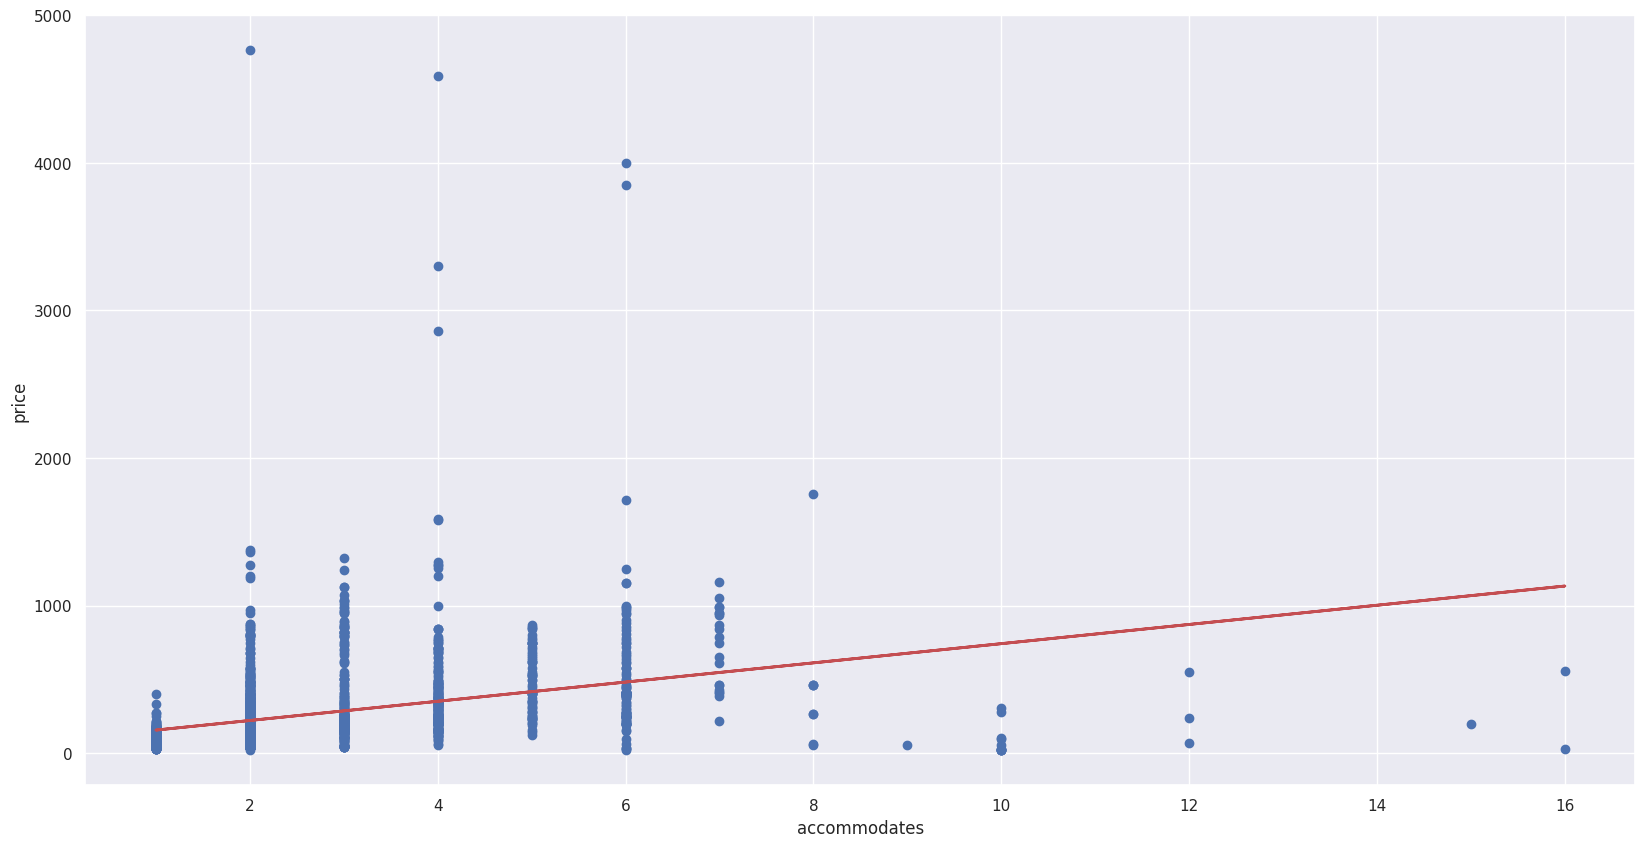

In [144]:
#Try to predict price using accommodates
accommodatesDF = pd.DataFrame(airDF["accommodates"])
price_test, price_train_pred, price_test_pred, explainedVariance = calcLinRegression(accommodatesDF, priceDF, solidLine= True, xTitle = "accommodates", yTitle = "price")
None

Using linear regression, the explained variance of just ~0.10 to ~0.14 shows that accommodates does not prove to be very useful in being a factor that affects price, and its mean squared error is very high.

#### 1f) amenities vs price 

We will go through two approaches, one using the amenities in a one hot encoding, and the other using the number of amenities.

In [145]:
#Insert categorical prediction (JSEN PLS BUCK UP)

Regression intercept 		: b =  89.50137012092472
Regression coefficients 	: a =  [7.07963824]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.04486238326823311
Mean Squared Error (MSE)	: 60849.562577778684
Root Mean Squared Error (RMSE) 	: 246.67704104309888
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.11023326729037486
Mean Squared Error (MSE)	: 62770.207255315836
Root Mean Squared Error (RMSE) 	: 250.53983167415882



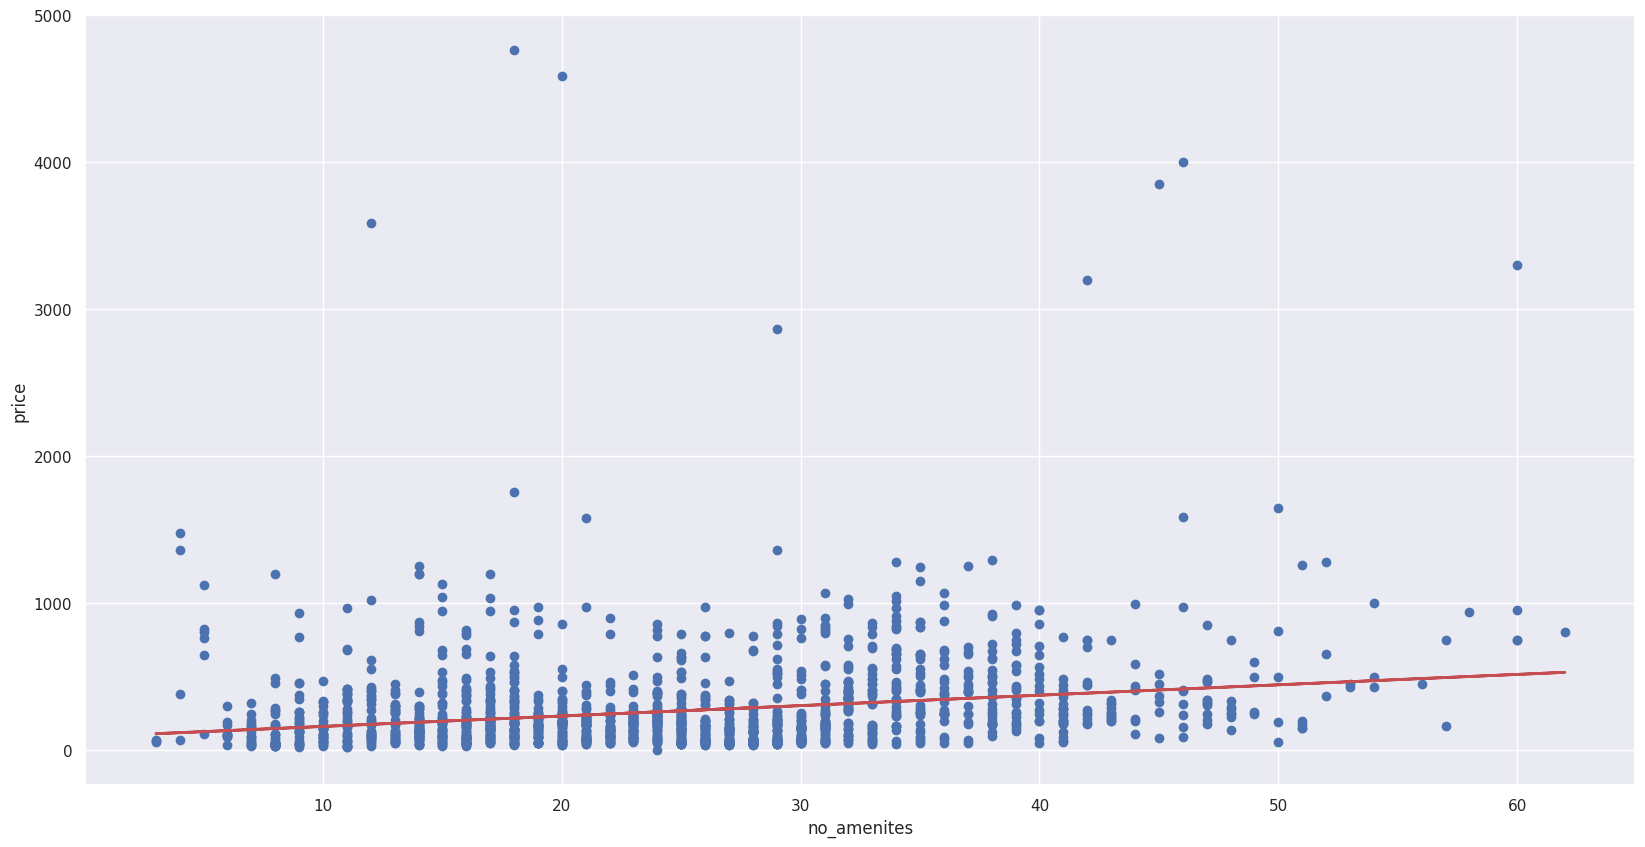

In [146]:
#Try to predict price using no_amenities
noAmenitiesDF = pd.DataFrame(airDF["no_amenities"])
price_test, price_train_pred, price_test_pred, explainedVariance = calcLinRegression(noAmenitiesDF, priceDF, solidLine= True, xTitle = "no_amenites", yTitle = "price")
None

#### 1g) number_of_reviews vs price 

Regression intercept 		: b =  275.7014954544816
Regression coefficients 	: a =  [-1.05102732]
-------------------------------
Goodness of Fit (Train)
Explained Variance (R^2) 	: 0.009813316736010713
Mean Squared Error (MSE)	: 68644.76596884996
Root Mean Squared Error (RMSE) 	: 262.0014617685366
-------------------------------
Goodness of Fit (Test)
Explained Variance (R^2) 	: 0.0077423998934069704
Mean Squared Error (MSE)	: 68968.06999478325
Root Mean Squared Error (RMSE) 	: 262.61772597214997



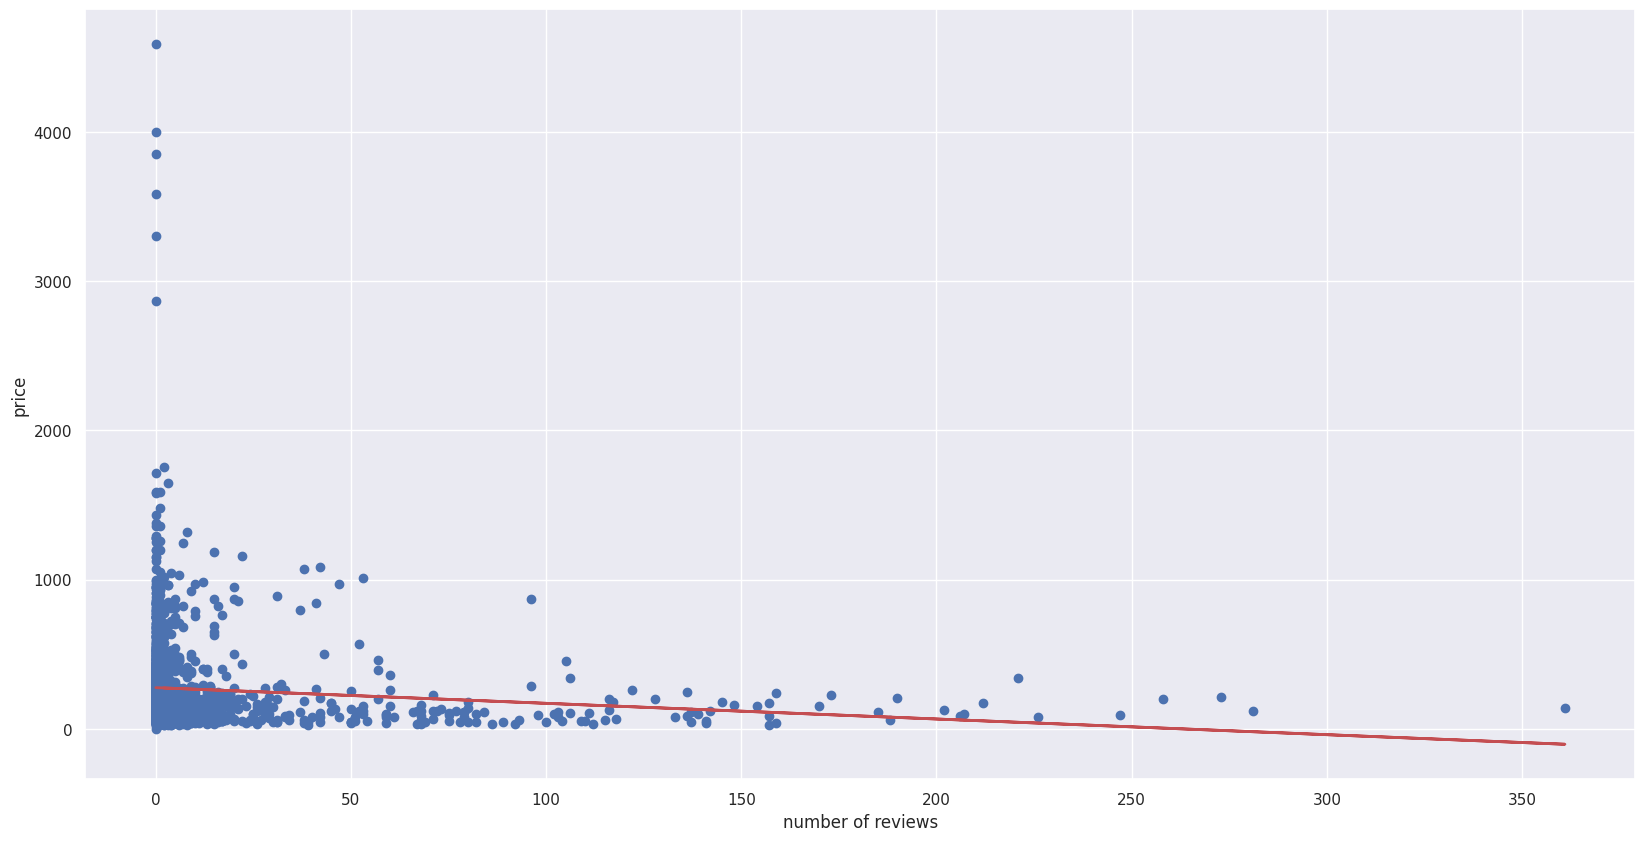

In [147]:
#Try to predict price using number_of_reviews
reviewsDF = pd.DataFrame(airDF["number_of_reviews"])
price_test, price_train_pred, price_test_pred, explainedVariance = calcLinRegression(reviewsDF, priceDF, solidLine= True, xTitle = "number of reviews", yTitle = "price")
None